In [38]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from pandas import set_option

In [26]:
#names of the columns
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
         "capital-loss", "hours-per-week", "native-country", ">50K, <=50K"]

In [4]:
filename = "adult.csv"
dataset = read_csv(filename, names = names)

print(dataset.shape)

print(dataset.dtypes)

(32561, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50K, <=50K       object
dtype: object


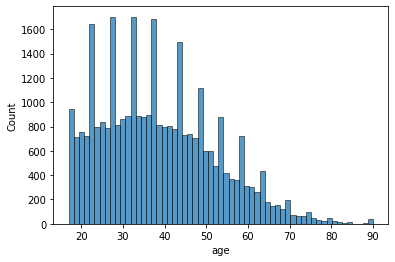

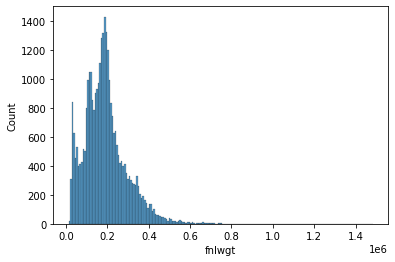

In [5]:
#histogram plot -> age
sns.histplot(data = dataset, x="age")
plt.show()

#histogram plot -> fnlwgt
sns.histplot(data = dataset, x = "fnlwgt")
plt.show()

In [10]:

#class distribution
class_counts = dataset.groupby(">50K, <=50K").size()
print(class_counts)
#statistical properties of the dataset

print(dataset.describe())

#check correlations
set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

>50K, <=50K
 <=50K    24720
 >50K      7841
dtype: int64
             age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000  3.256e+04      32561.000     32561.000     32561.000       32561.000
mean      38.582  1.898e+05         10.081      1077.649        87.304          40.437
std       13.640  1.055e+05          2.573      7385.292       402.960          12.347
min       17.000  1.228e+04          1.000         0.000         0.000           1.000
25%       28.000  1.178e+05          9.000         0.000         0.000          40.000
50%       37.000  1.784e+05         10.000         0.000         0.000          40.000
75%       48.000  2.371e+05         12.000         0.000         0.000          45.000
max       90.000  1.485e+06         16.000     99999.000      4356.000          99.000
                  age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
age             1.000 -7.665e-02          0.037     7.767e-02       

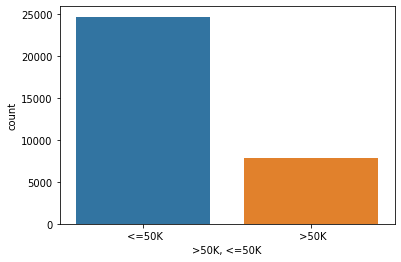

In [11]:
#seaborn countplot -> target income
ax = sns.countplot(x = ">50K, <=50K", data = dataset)
plt.show()

In [12]:

#check how many labels fall under workclass

print(dataset["workclass"].nunique())

#check what the labels are
print(dataset.workclass.unique())


# view frequency distribution of values

print(dataset.workclass.value_counts())

# replace '?' values in workclass variable with `NaN`

dataset['workclass'].replace(' ?', np.NaN, inplace=True)

9
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


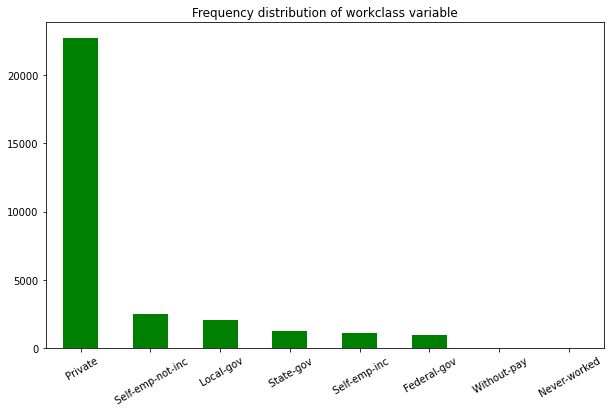

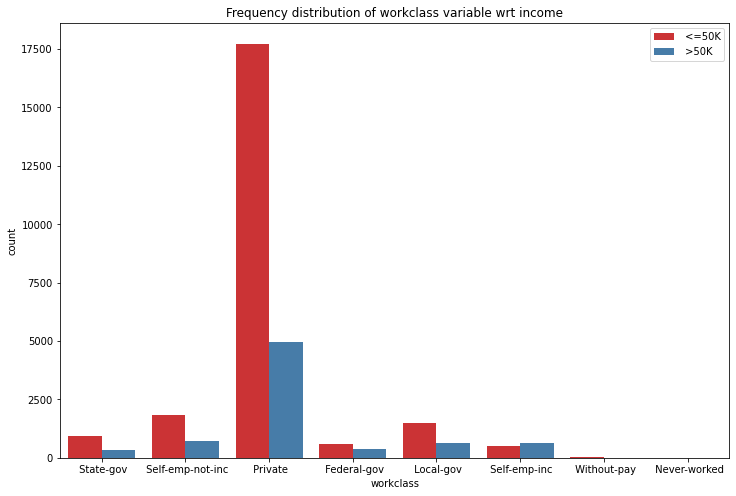

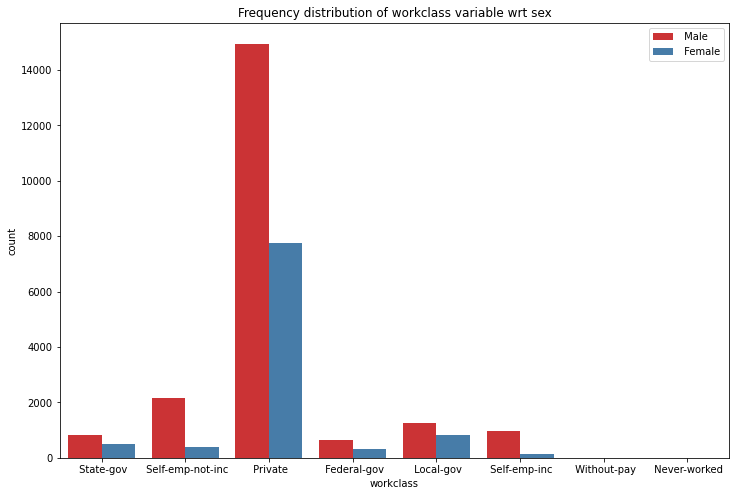

In [13]:

f, ax = plt.subplots(figsize=(10, 6))
ax = dataset.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(dataset.workclass.value_counts().index, rotation=30)
plt.show()


f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue=">50K, <=50K", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()


In [15]:
print(dataset["occupation"].nunique())

15


In [16]:
print(dataset["occupation"].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [18]:
# view frequency distribution of values

dataset.occupation.value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
# replace '?' values in occupation variable with `NaN`

dataset['occupation'].replace(' ?', np.NaN, inplace=True)


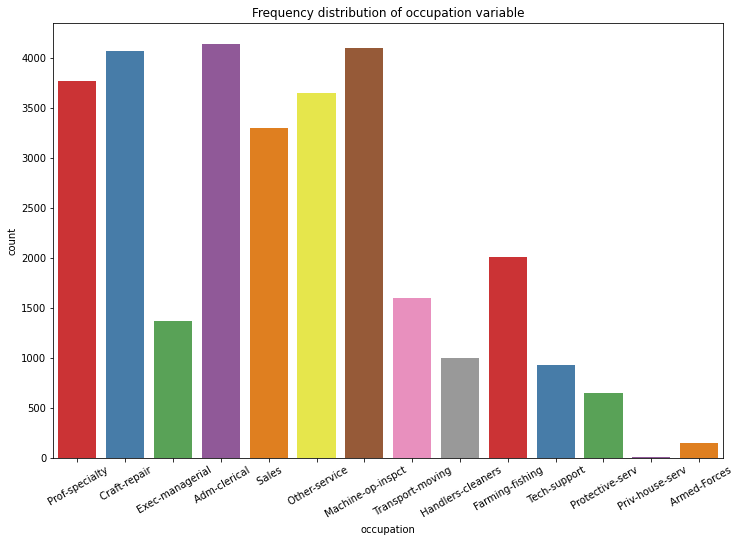

In [22]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(dataset.occupation.value_counts().index, rotation=30)
plt.show()


In [29]:
# check number of unique labels

dataset["native-country"].nunique()

42

In [30]:
# view unique labels 

dataset["native-country"].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [31]:
# check frequency distribution of values

dataset["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [32]:
# replace '?' values in native_country variable with `NaN`

dataset['native-country'].replace(' ?', np.NaN, inplace=True)


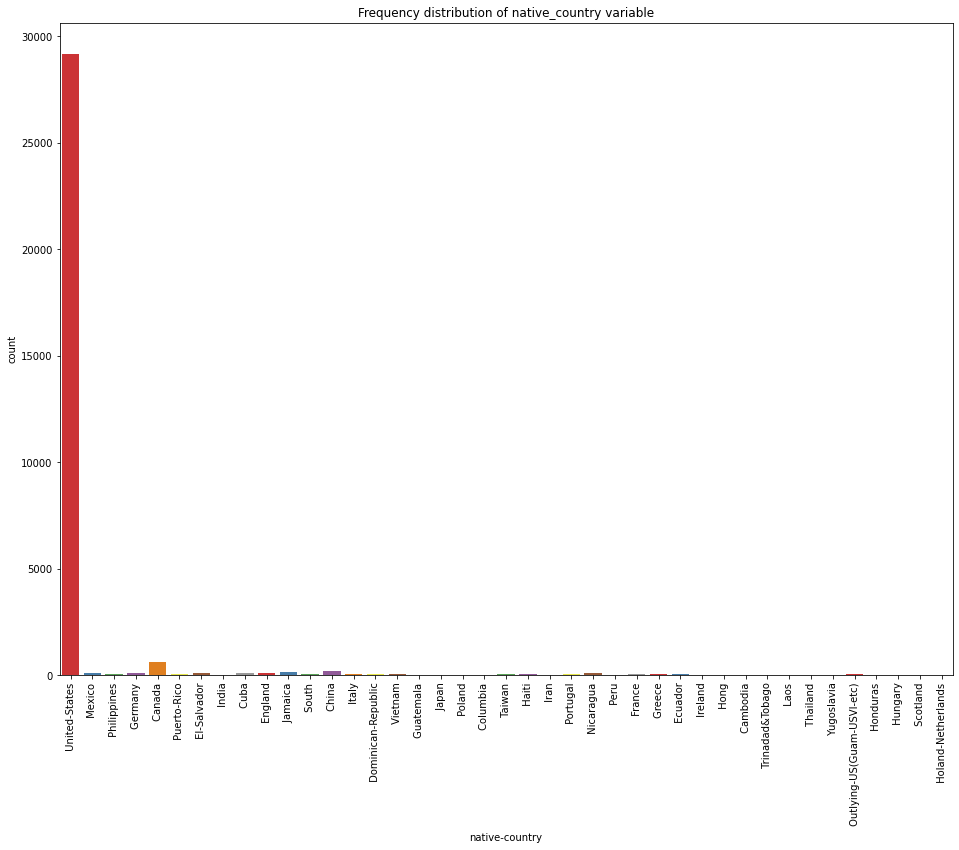

In [34]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native-country", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(dataset["native-country"].value_counts().index, rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


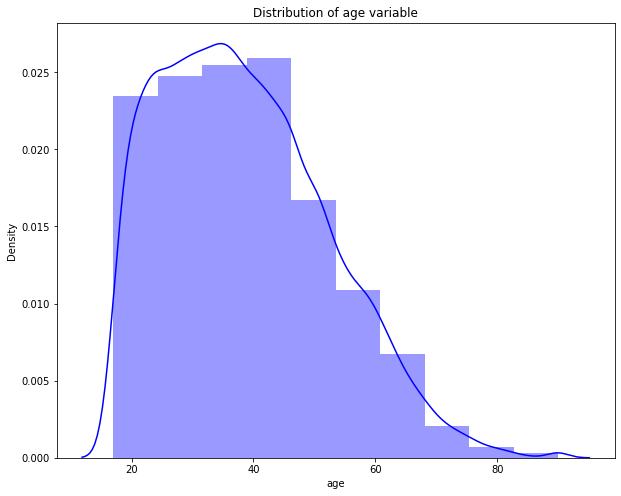

In [35]:
f, ax = plt.subplots(figsize=(10,8))
x = dataset['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


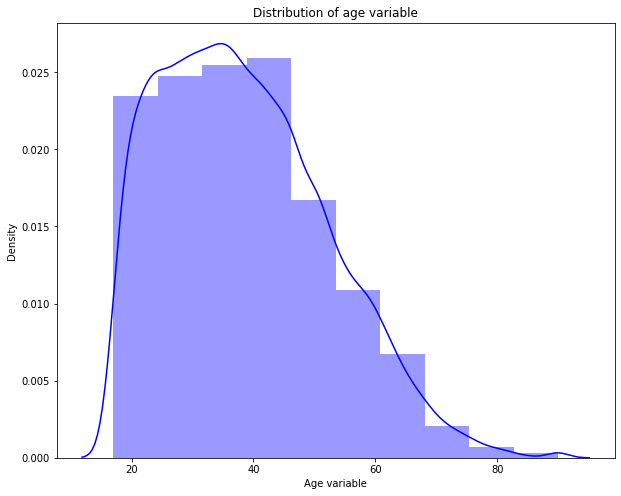

In [39]:
f, ax = plt.subplots(figsize=(10,8))
x = dataset['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()


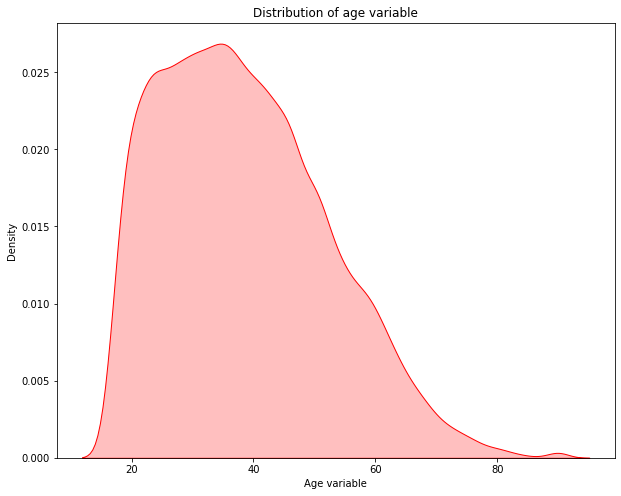

In [40]:
f, ax = plt.subplots(figsize=(10,8))
x = dataset['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


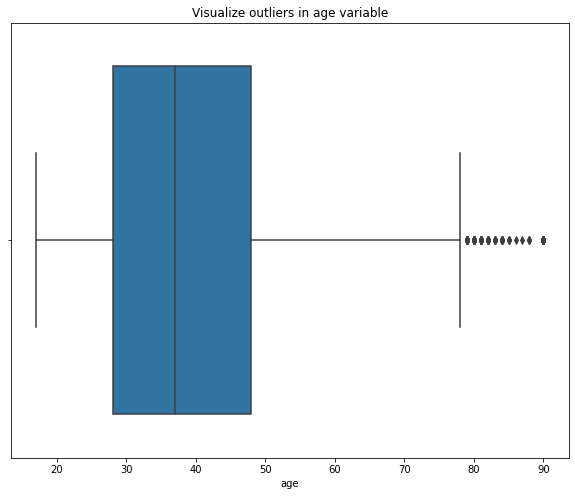

In [41]:
f, ax = plt.subplots(figsize=(10,8))
x = dataset['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

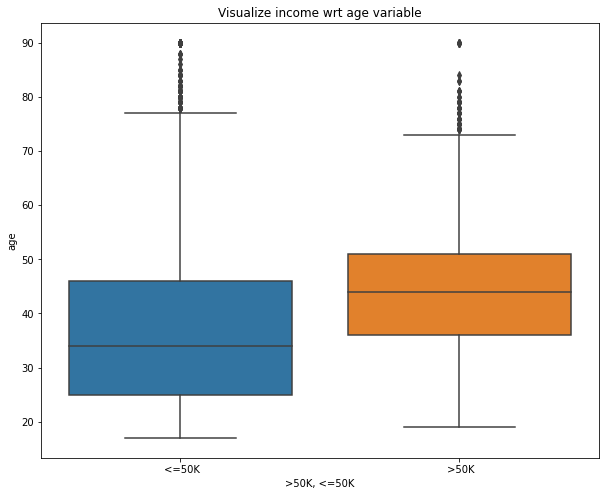

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x=">50K, <=50K", y="age", data=dataset)
ax.set_title("Visualize income wrt age variable")
plt.show()


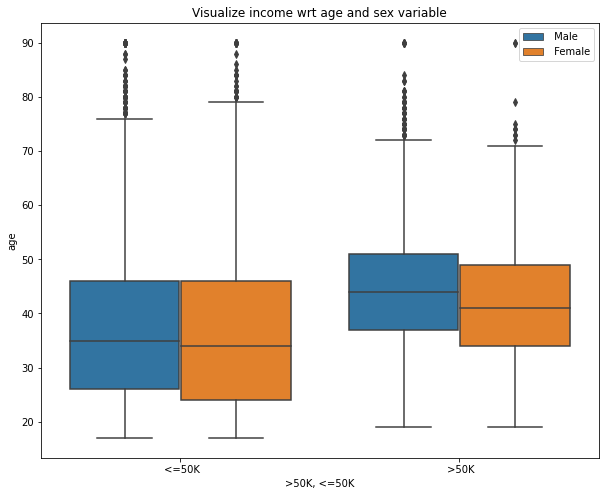

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x=">50K, <=50K", y="age", hue="sex", data=dataset)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()


<Figure size 576x432 with 0 Axes>

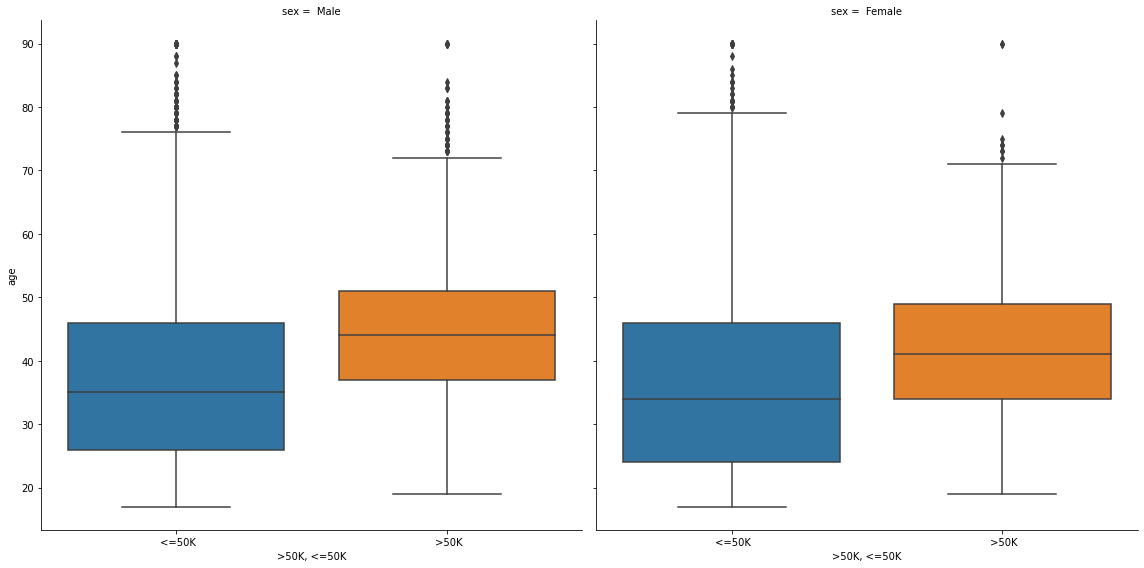

In [48]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x=">50K, <=50K", y="age", col="sex", data=dataset, kind="box", height=8, aspect=1)
plt.show()

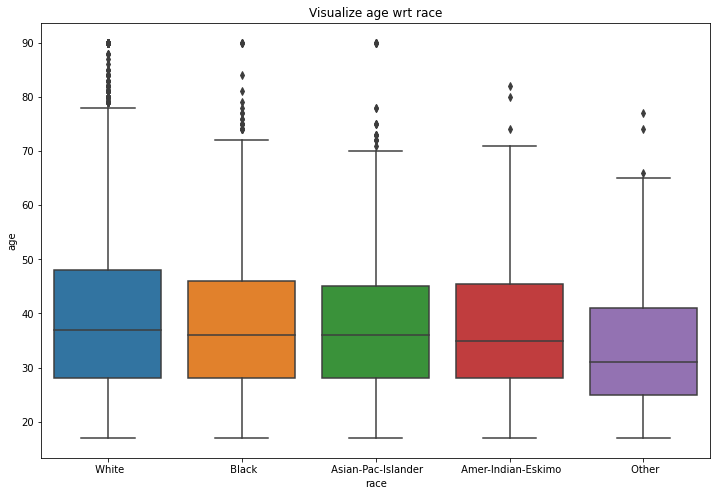

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = dataset)
plt.title("Visualize age wrt race")
plt.show()

In [67]:
X = dataset.drop(['>50K, <=50K'], axis=1)

y = dataset['>50K, <=50K']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [74]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
results = []
names = []

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
    test_size=validation_size, random_state=seed)

for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/l

LR: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 545, in fit
    X, y, ensure_min_samples=2, estimator=self, dtype=[np.float64, np.float32]
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  Fil

LDA: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/local

KNN: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-packa

CART: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 246, in fit
    X, y, np.unique(y), _refit=True, sample_weight=sample_weight
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 402, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
  File "/usr

NB: nan (nan)
SVM: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 196, in fit
    accept_large_sparse=False,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/vali